In [1]:
import numpy as np
import pickle
import random
import pandas as pd
from model import Brain
from submodels import factories
import argparse
import os
from pathlib import Path
from traceback import print_exc
import re
import matplotlib.pyplot as plt
from jf.db import DB
from lib.plot import plot_2d_positions_colors
from tqdm import tqdm
import time
from vizualisation.plot import *

In [2]:
def multi_plot(ls, args=None, save=False):
    line = mean_sd(ls)
    plot_lines_number_cells([line])
    plt.title(str(args))
    if save:
        plt.savefig(str(time.time()) + ".png")
    plt.show()
    plt.close()
    
def run_one(args):
    ccls = factories["triambimutant"](**args)

    bb = Brain(time_step=0.5, verbose=False, start_population=6,
            cell_cls=ccls.generate, end_time=90, start_time=49, silent=True)
    bb.run()
    return dict(stats=bb.stats, history=bb.build_cell_history())
    
def run_full(args):
    res = [run_one(args) for x in tqdm(range(5))]
    render_nb_progenitor.make_from_datalist([x["stats"] for x in res], "stats")
    return res

100%|██████████| 5/5 [06:36<00:00, 79.27s/it] 


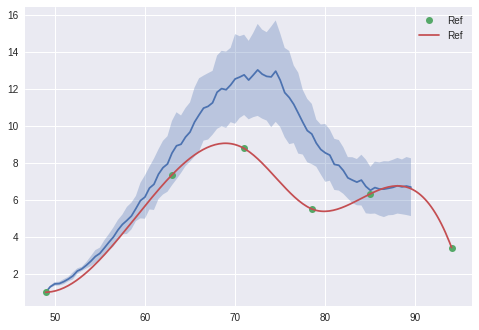

In [3]:
args = dict(
    timesteps=[49, 61, 72, 83, 95],
    tc_coeff_RG=[1.2, 1.2, 1.2, 1.2, 1.2],
    tc_coeff_IP=[1., 1., .9, .9, .9],
    diff_values_RG_GP=[1., 1., 1., 0.8, 0.6], # prob GP vs IP knowing it's not renew
    diff_values_RG_IP=[.8, .6, .35, 0.5, 0.5], # prob IP vs renew
    diff_values_IP=[0.3, 0.3, 0.3, 0.3, 0.3],
    bias_ratio=[0.7, 0.62, 0.33, 0.5, 0.5],  # the higher is the bias, the more there are RG
    coeff_mutant=0.2,
    smooth=1.0,
    start_val=0.4,
    id_mutant=-1,
    GP_as_IP=False,
)
res = run_full(args)

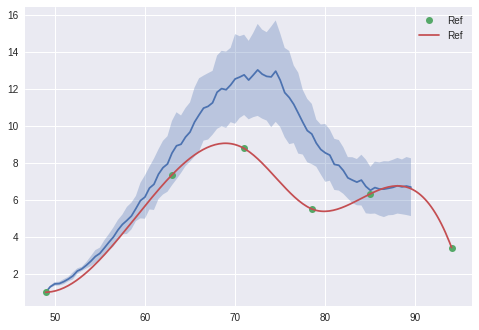

In [4]:
render_nb_progenitor.make_from_datalist([x["stats"] for x in res], "stats")

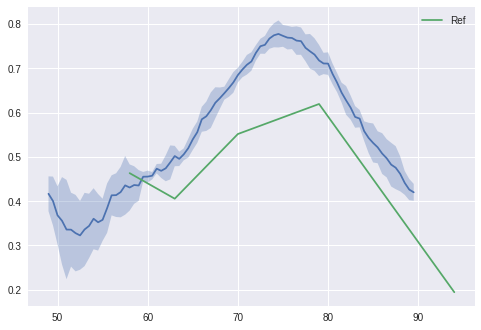

In [5]:
render_ratio.make_from_datalist([x["stats"] for x in res], "stats")

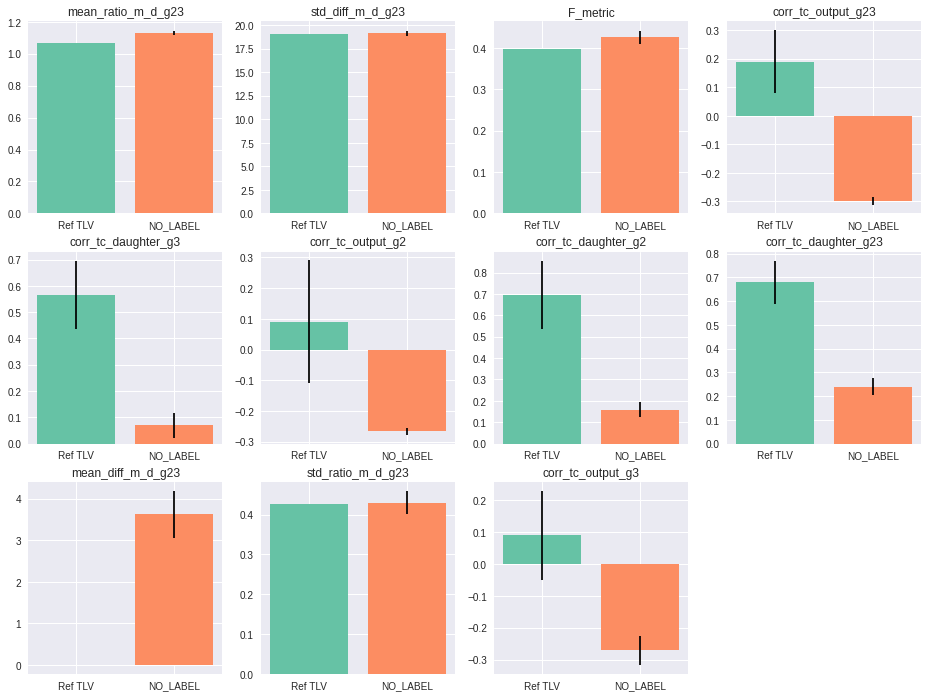

In [6]:
render_corr_metrics.make_from_datalist([x["history"] for x in res], "history")